# QF 627 Programming and Computational Finance
## Lesson 05 | Predictive Models with Machine Learning `Part 1` 

> Hi, Team 👋 Today, we will begin with predictive modeling of market movements 🙂

> Specifically, we will start by gaining an understanding of the rationale behind the use of regression for predictive models. We will then move towards machine learning in an incremental manner.

## DEPENDENCIES

In [1]:
# Load libraries.

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

import time

import datetime as dt
import re

import plotly.express as px

from pandas_datareader import data as pdr

import yfinance as yf

(
    yf
    .pdr_override()
)

import warnings
warnings.filterwarnings("ignore")

# Setting baseline seed
np.random.seed(230218)

# Set print options.

np.set_printoptions(precision = 3)

plt.style.use("ggplot") # Grammar of Graphics Theme

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

%matplotlib inline

## 👉 <a id = "top">Learning Pointers</a> 👈 

## [1. A Refresher on Linear Regression](#p1)

> ### <font color = red> OLS </font>

## [2. Price Prediction](#p2)

> ### <font color = red> Warm-up </font>

## [3. Index Levels Prediction](#p3)

> ### <font color = red> with OLS </font>

## [4. Future Returns Prediction](#p4)

> ### <font color = red> One More Step before Learning ML </font>

## [5. Market Movement Prediction using Machine Learning](#p5)

> ### <font color = red> A Gentle Introduction to ML </font>

## [6. What We Learned](#p6)

> ### <font color = red> Thus far... </font>

## <a id = "p1">1. </a> <font color = "green"> A Refresher on Linear Regression </font>  [back to table of contents](#top)

> Before applying linear regression, a quick review of the approach based on some randomized data might be helpful. The example code uses NumPy to first generate an ndarray object with data for the independent variable x.

> Based on this data, randomized data points are created for the outcome variable y.

> NumPy provides two functions, `polyfit` and `polyval`, for convenient implementation of OLS regression based on simple monomials. For a linear regression, the highest degree for the monomials to be used is set to 1.

#### Let's create an evenly spaced grid of floats for the x values between 0 and 10.

In [2]:
x =\
    (np
     .linspace(0, 10)
    )

> Here, the code is using the `linspace` (**linearly spaced**) function from the `numpy` library.

> np.linspace(start, stop, num = 50) returns evenly spaced numbers over a specified interval. By default, `num = 50`, meaning it will return an array of 50 evenly spaced values between the start and stop values.

> In the given code, x will be an array of 50 values starting from 0 and ending in 10, inclusive.

In [3]:
print(x)

[ 0.     0.204  0.408  0.612  0.816  1.02   1.224  1.429  1.633  1.837
  2.041  2.245  2.449  2.653  2.857  3.061  3.265  3.469  3.673  3.878
  4.082  4.286  4.49   4.694  4.898  5.102  5.306  5.51   5.714  5.918
  6.122  6.327  6.531  6.735  6.939  7.143  7.347  7.551  7.755  7.959
  8.163  8.367  8.571  8.776  8.98   9.184  9.388  9.592  9.796 10.   ]


> This simple code could serve multiple purposes in Computational Finance:

* `Time Series Modeling`: The linspace function can be used to generate a time grid. For example, if we're considering a 10-year period for a financial model (like pricing an option or a bond), x can represent that timeframe.
<br>

* `Model Calibration`: When trying to calibrate a model to market data, linspace could help generate an array of parameters to evaluate. For instance, if you're looking for an optimal interest rate in a range, you might scan rates between 0% and 10%.
<br>

* `Visualization`: When plotting functions or financial instruments' payoffs (like the payoff of an option at maturity), linspace can be used to generate the x-values over which you'll evaluate the function.
<br>

> Ramifications:

* `Sampling Bias`: Using linspace assumes that you want evenly spaced points. In some financial scenarios, it might be more appropriate to have more points clustered around certain critical values (e.g., around the current stock price if plotting an option's payoff).
<br>

* `Computation Overhead`: Though generating 50 values using linspace isn’t computationally intensive, in more complex simulations or when generating a larger number of points, the computational overhead can become significant.
<br>

* `Assumption of Linearity`: By using evenly spaced values, there's an implicit assumption of linearity or uniformity. This might not always be appropriate, especially in financial markets where volatility and rapid changes can lead to non-linear effects.

> While it's a simple function, it underscores the importance of grid generation, time-stepping, and parameter scanning, all of which are crucial in various financial modeling scenarios.

#### Then, let's fix the seed values for all relevant random number generators.

In [4]:
import random

In [5]:
def setting_seed(seed = 100):
    random.seed(seed)
    np.random.seed(seed)

In [6]:
setting_seed(230919)

> Now let's generate a new array y by adding a random noise (from a standard normal distribution) to each value in the array x.

In [7]:
y =\
    x + np.random.standard_normal(len(x)
                                  )

In [8]:
ols =\
    np \
    .polyfit(x, y, 
             deg = 1)

> Here, `ols[0]` will be the slope (or gradient) of the line, and `ols[1]` will be the y-intercept.

In [9]:
ols

array([ 1.003, -0.059])

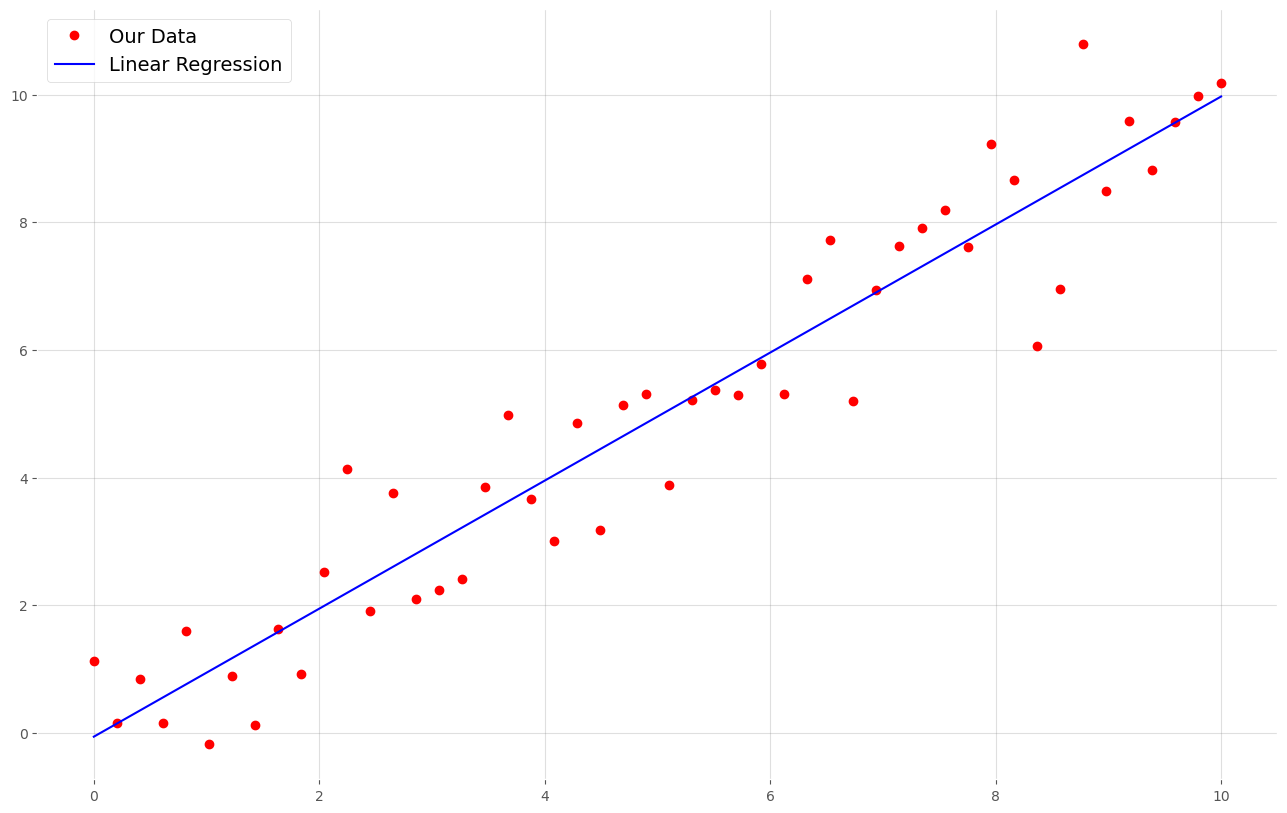

In [10]:
plt.figure(figsize = (16,10)
           )

plt.plot(x, y,
         "ro",
         label = "Our Data")

plt.plot(x, 
         np.polyval(ols, x),
         "b",
         label = "Linear Regression")

plt.legend(loc = 0)

> The function `np.polyval(ols, x)` evaluates the polynomial (in this case, our linear regression) at the specified x values. The `b` argument indicates that the line should be blue.

> The interval for the predictor variable x is 0–10. Enlarging that interval to 0–20 allows us to predict values for the outcome variable y beyond the domain of the original data set by an extrapolation, given the optimal regression parameters.

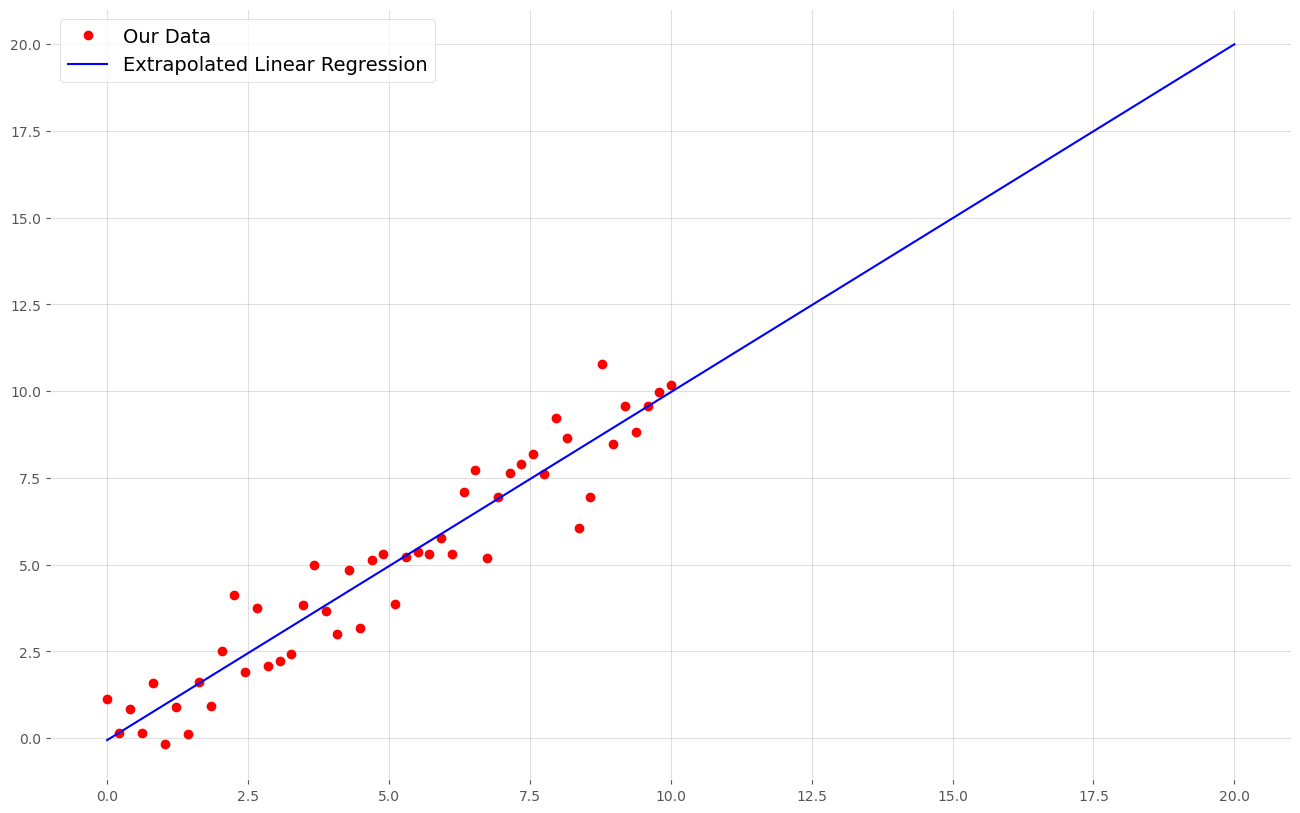

In [11]:
plt.figure(figsize = (16,10)
           )

plt.plot(x, y,
         "ro",
         label = "Our Data")

x_extended =\
    np \
    .linspace(0, 20)

plt.plot(x_extended, 
         np.polyval(ols, x_extended),
         "b",
         label = "Extrapolated Linear Regression")

plt.legend(loc = 0)

## <a id = "p2">2. </a> <font color = "green"> Price Prediction: The Basic </font>  [back to table of contents](#top)

> Price prediction based on time series data has to deal with one special feature: the time-based ordering of the data. 

> Generally, the ordering of the data is not important for the application of linear regression. 

> In the first example in the previous section, the data on which the linear regression is implemented could have been compiled in completely different orderings, while keeping the x and y pairs constant. Independent of the ordering, the optimal regression parameters would have been the same.

    Yet, to predict tomorrow’s index level, for instance, it seems to be of paramount importance to have the historic index levels in the correct order. 
    
    If this is the case, you might want to try to predict tomorrow’s index level from the index levels of today, yesterday, the day before, and so on. 
    
    The number of days used as input are generally called lags. Using today’s index level plus those of the two previous days therefore translates into three lags.

#### Let's demonstrates this notion into a simple context.

> Please generate the numbers from 0 to 11

In [12]:
DUMMY = np.arange(12)

In [13]:
DUMMY

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

> Let's assume three lags for the regression

In [14]:
LAGS = 3

    This means that three predictor variables for the regression and one outcome variable. That is, 0, 1, and 2 are values of the predictor variables, while 3 would be the corresponding value for the outcome variable. 
    
    Moving forward on step (in time), the values are 1, 2, and 3, as well as 4. The final combination of values is 8, 9, and 10 with 11

> Let's instantiate an ndarray object with the appropriate dimensions.

> We will create a matrix filled with zeros using the numpy library. 

> The dimensions of the matrix are determined by the variables LAGS and DUMMY.

In [15]:
matrix =\
    np \
    .zeros(
           (LAGS + 1, len(DUMMY) - LAGS)
           )

> `np.zeros()` is a function from the numpy library used to generate an array filled with zeros. The shape of the array is provided as a tuple argument.

> `(LAGS + 1, len(DUMMY) - LAGS)` specifies the dimensions of the matrix. The number of rows is LAGS + 1, and the number of columns is len(DUMMY) - LAGS.

In [16]:
matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [17]:
matrix[LAGS] = DUMMY[LAGS: ] # where we define our outcome variable

In [18]:
matrix

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]])

In [19]:
matrix[LAGS]

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

> `matrix[LAGS]` targets the row of matrix at index LAGS. In Python and numpy, indices start at 0. So, if LAGS is 1, this would refer to the second row of the matrix.

> `DUMMY[LAGS:]` returns a slicing operation on the list or array DUMMY. It selects all values starting from index LAGS to the end of the list or array. For example, if DUMMY is [0, 1, 2, 3, 4, 5] and LAGS is 2, the slice would be [2, 3, 4, 5].

> `matrix[LAGS] = DUMMY[LAGS:]` assigns the sliced values from DUMMY to the specified row of matrix.

In [20]:
DUMMY[0:-3]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [21]:
for i in range(LAGS): # to iterate over the numbers FROM 0 to LAGS - 1
    matrix[i] = DUMMY[i:i - LAGS] # where we define our outcome variable

In [22]:
print(matrix);print(matrix.T)

[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.]
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 3.  4.  5.  6.  7.  8.  9. 10. 11.]]
[[ 0.  1.  2.  3.]
 [ 1.  2.  3.  4.]
 [ 2.  3.  4.  5.]
 [ 3.  4.  5.  6.]
 [ 4.  5.  6.  7.]
 [ 5.  6.  7.  8.]
 [ 6.  7.  8.  9.]
 [ 7.  8.  9. 10.]
 [ 8.  9. 10. 11.]]


> In the transposed ndarray object `matrix`, the first three columns contain the values for the three independent variables. 

> They together form the matrix. 

> The fourth and final column is the vector.

> As a result, linear regression then yields the missing vector. Since there are now more independent variables, `polyfit` and `polyval` do not work any more.

> Yet, as discussed in class, nothing is impossible. There is a function in the NumPy sub-package for linear algebra (`linalg`) that allows us to solve general least-squares problems: `lstsq`.

In [23]:
matrix[:LAGS].T

array([[ 0.,  1.,  2.],
       [ 1.,  2.,  3.],
       [ 2.,  3.,  4.],
       [ 3.,  4.,  5.],
       [ 4.,  5.,  6.],
       [ 5.,  6.,  7.],
       [ 6.,  7.,  8.],
       [ 7.,  8.,  9.],
       [ 8.,  9., 10.]])

In [24]:
matrix[LAGS]

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [25]:
OLS =\
    np \
    .linalg \
    .lstsq(matrix[:LAGS].T,
           matrix[LAGS],
           rcond = None)[0]

> `np.linalg.lstsq()` function is from numpy's linear algebra module (linalg) and is used to solve the least squares solution to a linear matrix equation. It minimizes the Euclidean 2-norm (i.e., the sum of the squared differences) between a given matrix's dot product with an array and another array.

> `matrix[:LAGS].T` This slices the matrix to get all rows up to (but not including) the LAGS row and then transposes it (.T). The resulting matrix will be the "independent variables" or predictors in the OLS regression.

> `matrix[LAGS]`: This specifies the row of matrix at index LAGS, which will serve as the "dependent variable" or target in the OLS regression.

> `rcond = None` `relative condition` uses the default machine precision.

> `[0]` The np.linalg.lstsq() function returns several outputs, including the solution to the least squares problem, the residuals, the rank of the matrix, and the singular values. By appending [0] at the end, we're only selecting the solution, which is the coefficients of the OLS regression.

> That is,

- coefficients = ols[0]
- residuals = ols[1]
- rank = ols[2]
- singular_values = ols[3]

In [26]:
OLS

array([-0.667,  0.333,  1.333])

In [27]:
matrix[:LAGS].T

array([[ 0.,  1.,  2.],
       [ 1.,  2.,  3.],
       [ 2.,  3.,  4.],
       [ 3.,  4.,  5.],
       [ 4.,  5.,  6.],
       [ 5.,  6.,  7.],
       [ 6.,  7.,  8.],
       [ 7.,  8.,  9.],
       [ 8.,  9., 10.]])

In [28]:
matrix[:LAGS].T.shape

(9, 3)

In [29]:
OLS

array([-0.667,  0.333,  1.333])

In [30]:
OLS.shape

(3,)

In [31]:
np \
    .dot(matrix[:LAGS].T,
         OLS)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

#### That completes the warm-up. Now let’s predict real-world financial time series data.

## <a id = "p3">3. </a> <font color = "green"> Index Levels Prediction </font>  [back to table of contents](#top)

> Do you remember the extraction of EUR/USD exchange rate?

In [32]:
USD_EUR =\
    pdr \
    .get_data_fred("DEXUSEU",
                   start = dt.datetime(2010, 10, 1),
                   end = dt.datetime(2023, 9, 19)
                  ).dropna()
USD_EUR

,DEXUSEU
DATE,
2010-10-01,1.3754
2010-10-04,1.3688
2010-10-05,1.3834
2010-10-06,1.3924
2010-10-07,1.3921
...,...
2023-09-11,1.0744
2023-09-12,1.0726
2023-09-13,1.0737


In [33]:
USD_EUR =\
    USD_EUR \
    .rename(columns = {"DEXUSEU": "PRICE"}
           )

In [34]:
USD_EUR

,PRICE
DATE,
2010-10-01,1.3754
2010-10-04,1.3688
2010-10-05,1.3834
2010-10-06,1.3924
2010-10-07,1.3921
...,...
2023-09-11,1.0744
2023-09-12,1.0726
2023-09-13,1.0737


> We'd like to create lagged values for a time series, which is a common practice in time series analysis and econometric modeling. 

> This approach is used often in financial data analysis, particularly in the context of autoregressive models, where past values (lags) of a time series are used to predict the current or future values.

In [35]:
LAGS = 5

COLS = []

In [36]:
for LAG in range(1, LAGS + 1):
    # Initializes a loop that will run from 1 through LAGS. 
    # Each iteration corresponds to a different lag value.
    COL = f"lag_{LAG}"
    # Create a string for the column name corresponding to the current lag. 
    # For example, if LAG is 1, COL will be "lag_1". 
    # This naming scheme is a crystal clear way 
    # to keep track of columns corresponding to different lags.
    USD_EUR[COL] = USD_EUR["PRICE"].shift(LAG)
    # Here, the .shift() method is used to create 
    # the lagged values of the "PRICE" column in the USD_EUR DataFrame. 
    # The number of periods to shift is specified by LAG. 
    # This newly created lagged series is then added 
    # to the USD_EUR DataFrame as a new column with the name COL.
    COLS.append(COL)
    # Adds the current COL name to the COLS list, 
    # which is a list used to keep track of the created lag columns.

    # By the end of this loop, the USD_EUR DataFrame will have LAGS new columns, 
    # each containing lagged values of the "PRICE" column. 
    # The names of these columns will be stored in the COLS list.

    # For example, if LAGS is 3, 
    # the USD_EUR DataFrame will have three new columns: "lag_1", "lag_2", and "lag_3", 
    # each containing the 1-period, 2-period, and 3-period lagged values 
    # of the "PRICE" column, respectively.

In [37]:
COLS

['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']

In [38]:
USD_EUR = USD_EUR.dropna()

In [39]:
OLS =\
    np \
    .linalg \
    .lstsq(USD_EUR[COLS],
           USD_EUR["PRICE"],
           rcond = None)[0]

OLS

array([ 1.018, -0.031,  0.009, -0.014,  0.018])

In [40]:
USD_EUR["PREDICTION"] =\
    np.dot(USD_EUR[COLS], 
           OLS)

USD_EUR

,PRICE,lag_1,lag_2,lag_3,lag_4,lag_5,PREDICTION
DATE,,,,,,,
2010-10-08,1.3923,1.3921,1.3924,1.3834,1.3688,1.3754,1.391905
2010-10-12,1.3846,1.3923,1.3921,1.3924,1.3834,1.3688,1.391874
2010-10-13,1.3964,1.3846,1.3923,1.3921,1.3924,1.3834,1.384159
2010-10-14,1.4066,1.3964,1.3846,1.3923,1.3921,1.3924,1.396576
2010-10-15,1.3998,1.4066,1.3964,1.3846,1.3923,1.3921,1.406512
...,...,...,...,...,...,...,...
2023-09-11,1.0744,1.0709,1.0704,1.0714,1.0727,1.0787,1.070926
2023-09-12,1.0726,1.0744,1.0709,1.0704,1.0714,1.0727,1.074375
2023-09-13,1.0737,1.0726,1.0744,1.0709,1.0704,1.0714,1.072430


<Axes: xlabel='DATE'>

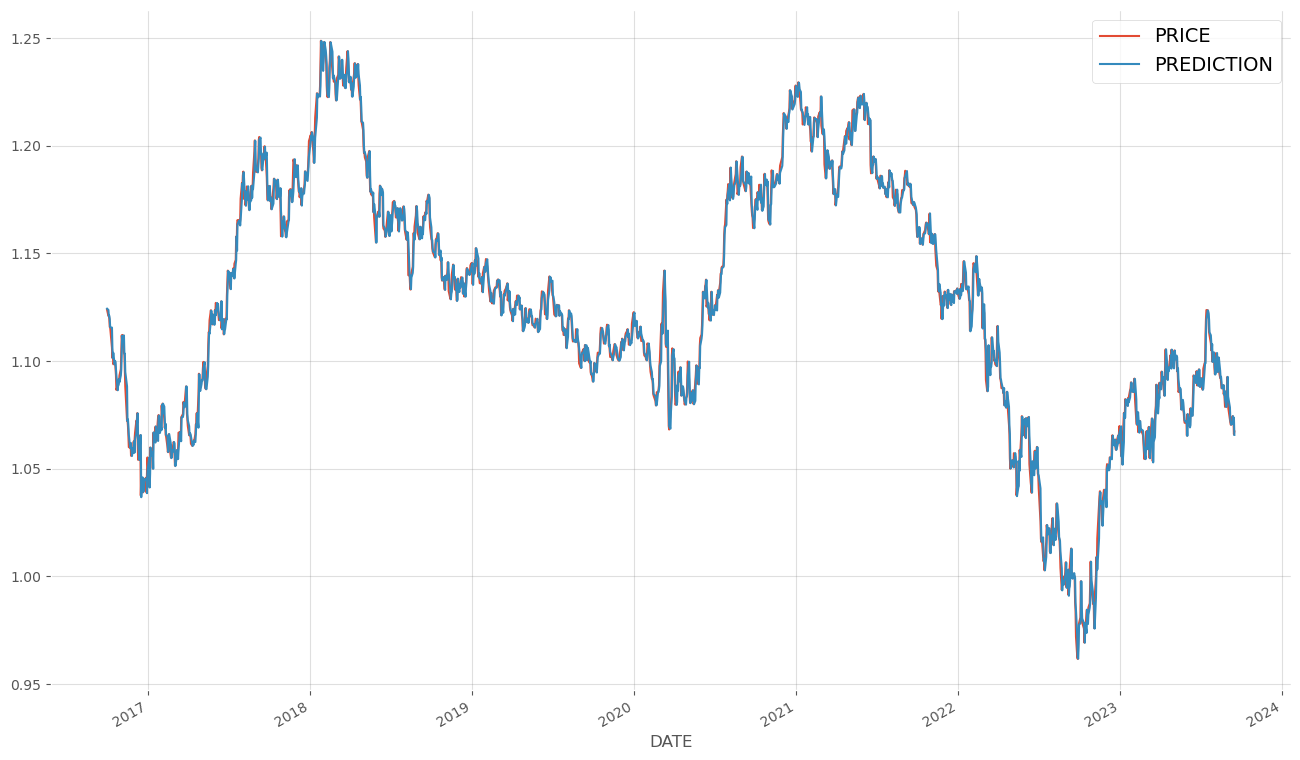

In [41]:
USD_EUR \
    [["PRICE", "PREDICTION"]] \
    .loc["2016-9-30": ] \
    .plot(figsize = [16,10]
         )

## <a id = "p4">4. </a> <font color = "green"> Future Returns Prediction </font>  [back to table of contents](#top)

> Up to now, the analysis was based on absolute rate levels. But (log) returns might be a better choice for such statistical applications. This is because of their characteristic of making the time series data stationary.

> This time, it is not only today’s return that is relevant if we are to predict tomorrow’s return; the regression results are also completely different in nature.

In [42]:
USD_EUR["RETURN"] =\
    np \
    .log(USD_EUR["PRICE"]
          /
         USD_EUR["PRICE"].shift(1)
         )

In [43]:
USD_EUR = USD_EUR.dropna()

In [44]:
COLS = []

In [45]:
for LAG in range(1, LAGS + 1):
    COL = f"lag_{LAG}"
    USD_EUR[COL] = USD_EUR["RETURN"].shift(LAG)
    COLS.append(COL)

In [46]:
USD_EUR = USD_EUR.dropna()

In [47]:
USD_EUR

,PRICE,lag_1,lag_2,lag_3,lag_4,lag_5,PREDICTION,RETURN
DATE,,,,,,,,
2010-10-19,1.3827,-0.001430,-0.004846,0.007278,0.008486,-0.005546,1.397464,-0.010861
2010-10-20,1.3949,-0.010861,-0.001430,-0.004846,0.007278,0.008486,1.382156,0.008785
2010-10-21,1.3973,0.008785,-0.010861,-0.001430,-0.004846,0.007278,1.395304,0.001719
2010-10-22,1.3904,0.001719,0.008785,-0.010861,-0.001430,-0.004846,1.397133,-0.004950
2010-10-25,1.3986,-0.004950,0.001719,0.008785,-0.010861,-0.001430,1.390333,0.005880
...,...,...,...,...,...,...,...,...
2023-09-11,1.0744,0.000467,-0.000934,-0.001213,-0.005578,-0.004809,1.070926,0.003263
2023-09-12,1.0726,0.003263,0.000467,-0.000934,-0.001213,-0.005578,1.074375,-0.001677
2023-09-13,1.0737,-0.001677,0.003263,0.000467,-0.000934,-0.001213,1.072430,0.001025


#### A Quick Discussion on  `f-strings`

In [48]:
stocks =\
    ["AAPL",
     "GOOGL",
     "NFLX",
     "AMZN"]

classmates =\
    ["A",
     "B",
     "C",
     "D"]

random_stocks = random.choice(stocks)
random_classmates = random.choice(classmates)

print(f"Let me buy {random_stocks} with {random_classmates}.")

Let me buy AMZN with D.


In [49]:
OLS =\
    np \
    .linalg \
    .lstsq(USD_EUR[COLS],
           USD_EUR["RETURN"],
           rcond = None)[0]

OLS

array([ 0.017, -0.009, -0.005, -0.016, -0.021])

In [50]:
USD_EUR["PREDICTION"] =\
    np \
    .dot(USD_EUR[COLS],
         OLS)

USD_EUR

,PRICE,lag_1,lag_2,lag_3,lag_4,lag_5,PREDICTION,RETURN
DATE,,,,,,,,
2010-10-19,1.3827,-0.001430,-0.004846,0.007278,0.008486,-0.005546,-0.000034,-0.010861
2010-10-20,1.3949,-0.010861,-0.001430,-0.004846,0.007278,0.008486,-0.000435,0.008785
2010-10-21,1.3973,0.008785,-0.010861,-0.001430,-0.004846,0.007278,0.000173,0.001719
2010-10-22,1.3904,0.001719,0.008785,-0.010861,-0.001430,-0.004846,0.000132,-0.004950
2010-10-25,1.3986,-0.004950,0.001719,0.008785,-0.010861,-0.001430,0.000054,0.005880
...,...,...,...,...,...,...,...,...
2023-09-11,1.0744,0.000467,-0.000934,-0.001213,-0.005578,-0.004809,0.000210,0.003263
2023-09-12,1.0726,0.003263,0.000467,-0.000934,-0.001213,-0.005578,0.000192,-0.001677
2023-09-13,1.0737,-0.001677,0.003263,0.000467,-0.000934,-0.001213,-0.000019,0.001025


<Axes: xlabel='DATE'>

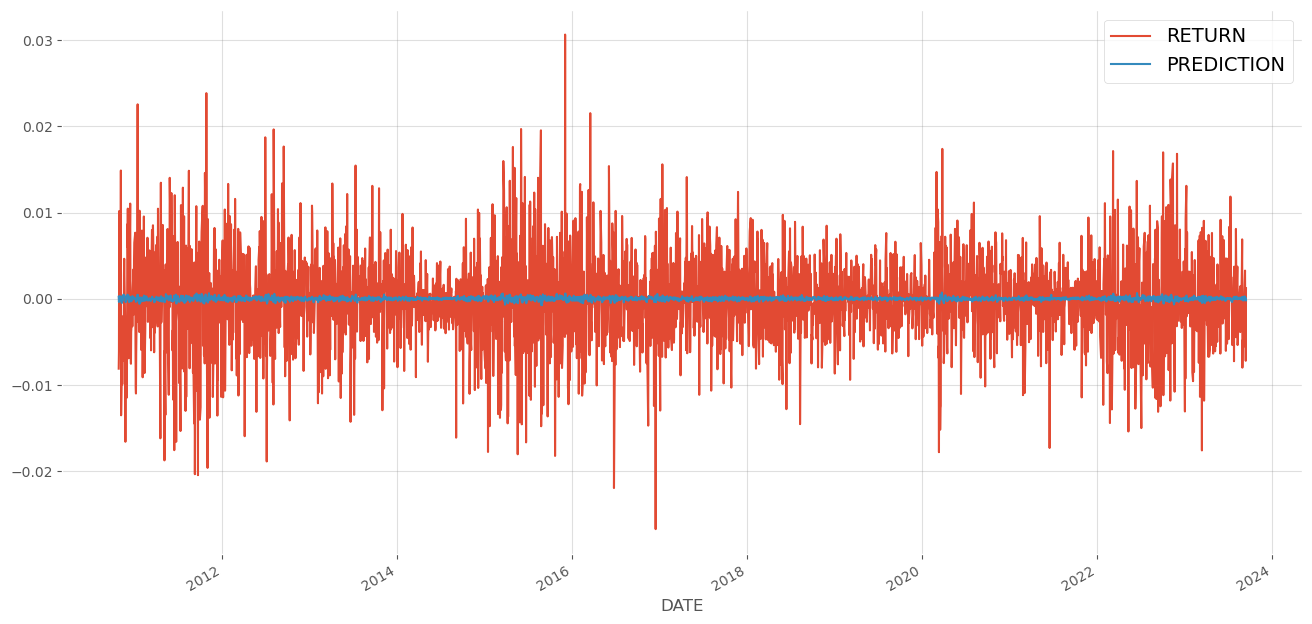

In [51]:
USD_EUR \
    [["RETURN", "PREDICTION"]] \
    .iloc[LAGS: ] \
    .plot(figsize = (16, 8)
         )

In [52]:
ACCURACY =\
    np \
    .sign(USD_EUR["RETURN"] * USD_EUR["PREDICTION"]
         ) \
    .value_counts()

In [53]:
ACCURACY

 1.0    1672
-1.0    1531
 0.0      26
Name: count, dtype: int64

In [54]:
ACCURACY.values[0] / sum(ACCURACY)

0.517807370703004

    Here, the prediction is _____ times correct and _____ wrong, which translates into a hit ratio of about ____ %, or almost exactly ______ %.

<a id="classification"></a>
### Future Market Direction Prediction

> One question is, can the hit ratio be improved by directly implementing the linear regression based on the sign of the log returns that serve as the dependent variable values? 

> In theory, at least, this simplifies the problem from predicting an absolute return value to predicting the sign of the return value.

In [55]:
REGRESSION =\
    np \
    .linalg \
    .lstsq(USD_EUR[COLS],
           np.sign(USD_EUR["RETURN"]
                  ),
           rcond = None)[0]

REGRESSION

array([-2.002, -6.529, -0.479, -6.657, -3.799])

In [56]:
USD_EUR["PREDICTION"] =\
    np \
    .sign(np.dot(USD_EUR[COLS],
                 REGRESSION)
         )

USD_EUR["PREDICTION"].value_counts()

PREDICTION
 1.0    1668
-1.0    1561
Name: count, dtype: int64

In [57]:
HIT_RATIO =\
    np \
    .sign(USD_EUR["RETURN"] * USD_EUR["PREDICTION"]
          ).value_counts()

HIT_RATIO

 1.0    1636
-1.0    1567
 0.0      26
Name: count, dtype: int64

In [58]:
HIT_RATIO.values[0] / sum(HIT_RATIO)

0.5066584081759059

### How to Execute Vectorized Backtesting of Regression-based Strategy 

> The hit ratio alone does not tell enough about the economic potential of a trading strategy using linear regression. It is well known that the ten best and worst days in the markets for a given period of time considerably influence the overall performance of investments.

> In an ideal scenario, a long-short trader would try to benefit from both best and worst days by going long and short, respectively, on the basis of appropriate market timing indicators. 

> Within the current context, this means that the quality of the market timing matters in addition to the hit ratio. 

> Thus, the `vectorized backtesting` you learned in Week 6 can give a better picture of the value of regression for prediction.

> Note that the prediction values already reflect the market positions (long or short). Let’s see if the strategy under the current assumptions outperforms the market (ignoring, among other things, transaction costs and in-sample).

In [59]:
USD_EUR

,PRICE,lag_1,lag_2,lag_3,lag_4,lag_5,PREDICTION,RETURN
DATE,,,,,,,,
2010-10-19,1.3827,-0.001430,-0.004846,0.007278,0.008486,-0.005546,-1.0,-0.010861
2010-10-20,1.3949,-0.010861,-0.001430,-0.004846,0.007278,0.008486,-1.0,0.008785
2010-10-21,1.3973,0.008785,-0.010861,-0.001430,-0.004846,0.007278,1.0,0.001719
2010-10-22,1.3904,0.001719,0.008785,-0.010861,-0.001430,-0.004846,-1.0,-0.004950
2010-10-25,1.3986,-0.004950,0.001719,0.008785,-0.010861,-0.001430,1.0,0.005880
...,...,...,...,...,...,...,...,...
2023-09-11,1.0744,0.000467,-0.000934,-0.001213,-0.005578,-0.004809,1.0,0.003263
2023-09-12,1.0726,0.003263,0.000467,-0.000934,-0.001213,-0.005578,1.0,-0.001677
2023-09-13,1.0737,-0.001677,0.003263,0.000467,-0.000934,-0.001213,-1.0,0.001025


In [60]:
USD_EUR["STRATEGY"] = USD_EUR["PREDICTION"] * USD_EUR["RETURN"]
USD_EUR

,PRICE,lag_1,lag_2,lag_3,lag_4,lag_5,PREDICTION,RETURN,STRATEGY
DATE,,,,,,,,,
2010-10-19,1.3827,-0.001430,-0.004846,0.007278,0.008486,-0.005546,-1.0,-0.010861,0.010861
2010-10-20,1.3949,-0.010861,-0.001430,-0.004846,0.007278,0.008486,-1.0,0.008785,-0.008785
2010-10-21,1.3973,0.008785,-0.010861,-0.001430,-0.004846,0.007278,1.0,0.001719,0.001719
2010-10-22,1.3904,0.001719,0.008785,-0.010861,-0.001430,-0.004846,-1.0,-0.004950,0.004950
2010-10-25,1.3986,-0.004950,0.001719,0.008785,-0.010861,-0.001430,1.0,0.005880,0.005880
...,...,...,...,...,...,...,...,...,...
2023-09-11,1.0744,0.000467,-0.000934,-0.001213,-0.005578,-0.004809,1.0,0.003263,0.003263
2023-09-12,1.0726,0.003263,0.000467,-0.000934,-0.001213,-0.005578,1.0,-0.001677,-0.001677
2023-09-13,1.0737,-0.001677,0.003263,0.000467,-0.000934,-0.001213,-1.0,0.001025,-0.001025


In [61]:
USD_EUR \
    [["RETURN", "STRATEGY"]] \
    .sum() \
    .apply(np.exp)

RETURN      0.763557
STRATEGY    0.950236
dtype: float64

<Axes: xlabel='DATE'>

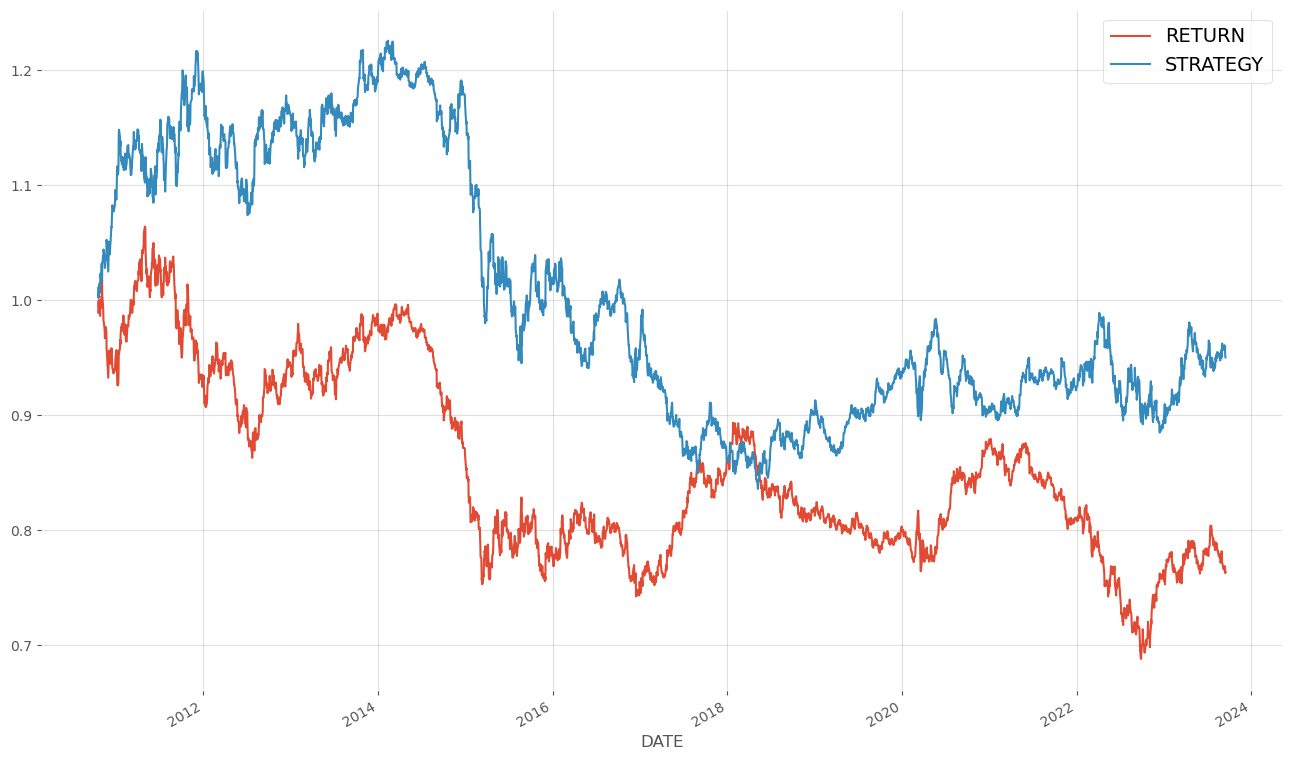

In [62]:
USD_EUR \
    [["RETURN", "STRATEGY"]] \
    .dropna() \
    .cumsum() \
    .apply(np.exp) \
    .plot(figsize = (16,10)
         )

## <a id = "p5">5. </a> <font color = "green"> Market Movement Prediction using Machine Learning </font>  [back to table of contents](#top)

> There are a number of Python packages in the machine learning field. The most popular one is `scikit-learn`, which is also one of the best documented and maintained packages. 

> We will first look into the API of the package based on linear regression, replicating some of the results above. 

> Then, we will use logistic regression as a classification algorithm to address the problem of predicting future market direction.

> Building on the fundamentals, let's apply logistic regression to the question of predicting market direction.

#### Let's run linear regression with scikit-learn

> Using scikit-learn for our purposes mainly consists of three steps:

    Step 1: Model selection | A model is to be picked and instantiated.
    
    Step 2: Model fitting | The model is to be fitted to the data at hand.
    
    Step 3: Prediction | Given the fitted model, the prediction is conducted.

#### Data Preparation (let's continue to use NumPy)

In [63]:
data = np.arange(12)
data

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [64]:
lags = 3

In [65]:
matrix =\
    np \
    .zeros(
           (lags + 1, len(data) - lags)
           )

In [66]:
matrix[lags] = data[lags:]

for i in range(lags):
    matrix[i] = data[i:i - lags]

In [67]:
matrix

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]])

#### Welcome to the world of scikit-learn

In [68]:
!pip install sklearn

In [69]:
from sklearn import linear_model

In [70]:
LM = linear_model.LinearRegression()

In [71]:
LM.fit(matrix[:lags].T,
       matrix[lags]
       )

LinearRegression()

In [72]:
LM.coef_

array([0.333, 0.333, 0.333])

In [73]:
LM.intercept_

2.0000000000000018

In [74]:
LM.predict(matrix[:lags].T)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [75]:
LM = linear_model.LinearRegression(fit_intercept = False)

In [76]:
LM.fit(matrix[:lags].T,
       matrix[lags]
       )

LinearRegression(fit_intercept=False)

In [77]:
LM.coef_

array([-0.667,  0.333,  1.333])

In [78]:
LM.intercept_

0.0

In [79]:
LM.predict(matrix[:lags].T)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

### A Basic Classification Question

> In a classification question of (supervised) machine learning, it has to be decided to which of a limited set of categories (`classes`) a new observation belongs. 

> In a financial market context, predicting the price of a financial instrument can lead to a numerical result that is far off the correct one or that is quite close to it. This is an estimation problem. 

> Predicting tomorrow’s market direction, there can only be a correct or a (`entirely`) wrong result. This is a classification problem with the set of categories limited to, for example, “up” and “down” or “+1” and “–1” or “1” and “0.”

In [111]:
HOURS_of_STUDY = \
        np.array([0.5, 0.75, 1., 1.25, 1.5, 1.75, 1.75, 2.,
                  2.25, 2.5, 2.75, 3., 3.25, 3.5, 4., 4.25,
                  4.5, 4.75, 5., 5.5])

In [81]:
PASSING_EXAM = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
                         0, 1, 1, 1, 1, 1, 1])

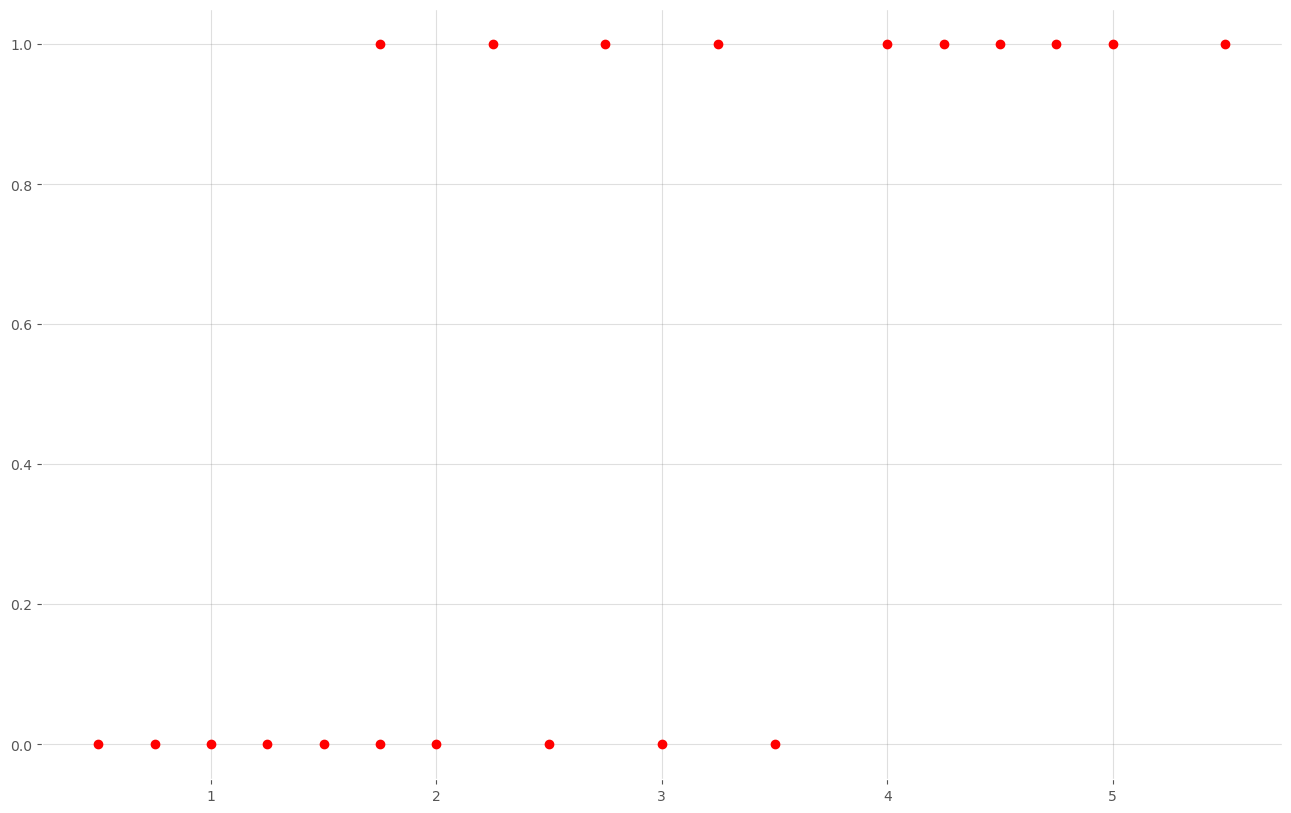

In [82]:
plt.figure(figsize = (16,10)
          )

plt.plot(HOURS_of_STUDY,
         PASSING_EXAM,
         "ro")

> Given a certain number of hours studied by a student (not in the data set), will they pass the exam or not? 

> What answer could linear regression give?

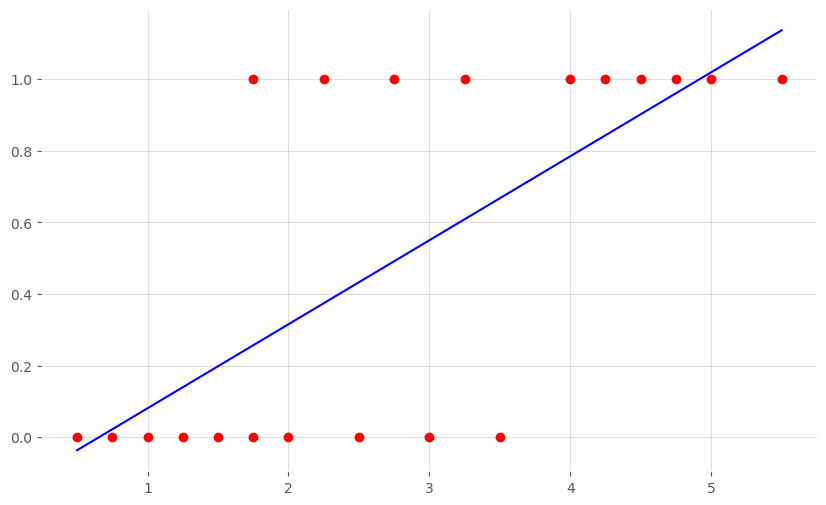

In [83]:
REGRESS = np.polyfit(HOURS_of_STUDY,
                     PASSING_EXAM,
                     deg = 1)

plt.figure(figsize = (10, 6)
          )

plt.plot(HOURS_of_STUDY,
         PASSING_EXAM, 
         "ro")

plt.plot(HOURS_of_STUDY,
         np.polyval(REGRESS, HOURS_of_STUDY), "b"
         )

> This is where classification algorithms (e.g., logistic regression; support vector machines) come into play.

In [84]:
model = linear_model.LogisticRegression(solver = "lbfgs")
model

LogisticRegression()

In [114]:
HOURS_of_STUDY.reshape(1,-1)

array([[0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 1.75, 2.  , 2.25, 2.5 , 2.75,
        3.  , 3.25, 3.5 , 4.  , 4.25, 4.5 , 4.75, 5.  , 5.5 ]])

In [115]:
PASSING_EXAM

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [85]:
HOURS_of_STUDY = HOURS_of_STUDY.reshape(1, -1).T

In [86]:
model.fit(HOURS_of_STUDY, 
          PASSING_EXAM)

LogisticRegression()

In [87]:
predictions = model.predict(HOURS_of_STUDY)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

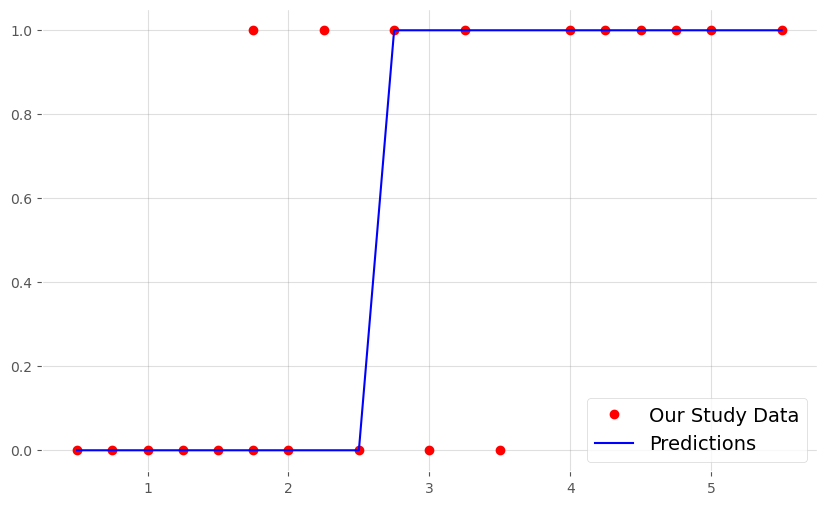

In [88]:
plt.figure(figsize = (10, 6)
          )

plt.plot(HOURS_of_STUDY,
         PASSING_EXAM, 
         "ro",
         label = "Our Study Data")

plt.plot(HOURS_of_STUDY,
         predictions, 
         "b",
         label = "Predictions"
        )

plt.legend(loc = 0)

> Here, note that there is no guarantee that 2.75 hours or more lead to success. 

> It just means `more probable` to succeed from that many hours on than to fail. 

> Such probabilistic reasoning can also be analyzed and visualized based on the same model instance

In [89]:
probability =\
    model \
    .predict_proba(HOURS_of_STUDY)

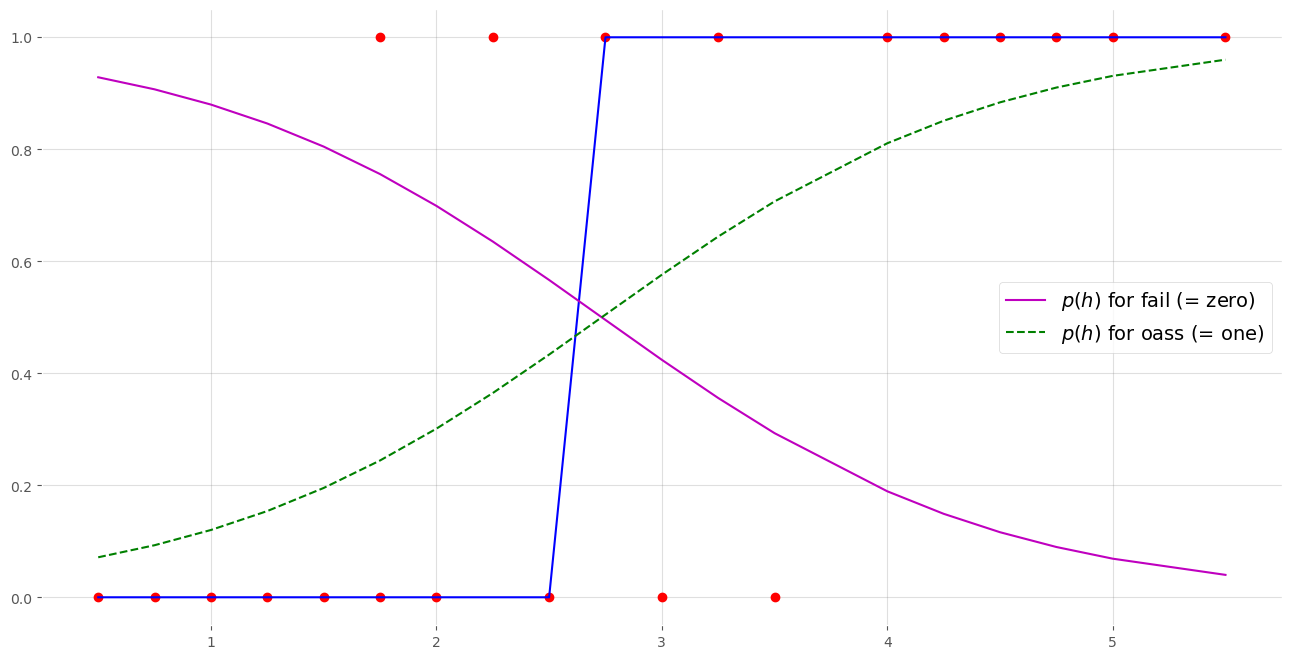

In [90]:
plt.figure(figsize = (16, 8)
          )

plt.plot(HOURS_of_STUDY,
         PASSING_EXAM, 
         "ro")

plt.plot(HOURS_of_STUDY,
         predictions, 
         "b"
        )

plt.plot(HOURS_of_STUDY,
         probability.T[0],
         "m-",
         label = "$p(h)$ for fail (= zero)"
         )

plt.plot(HOURS_of_STUDY,
         probability.T[1],
         "g--",
         label = "$p(h)$ for oass (= one)"
         )

plt.legend(loc = 0)

#### Building on the fundamentals, let's apply logistic regression to the question of predicting market direction.

> The simple classification example has a single feature only: the number of hours studied. In practice, one often has more than one feature that can be used for classification. 

> Given the prediction approach introduced in this chapter, one can identify a feature by a lag. Therefore, working with three lags from the time series data means that there are three features. 

> As possible outcomes or categories, there are only +1 and -1 for an upwards and a downwards movement, respectively. Although the wording changes, the formalism stays the same, particularly with regard to deriving the matrix, now called the feature matrix.

> Let's generate a pandas DataFrame based “feature matrix” to which the three step procedure applies equally well. The feature matrix will now be a sub-set of the columns in the original data set.

In [126]:
GOLD = pdr.get_data_yahoo("GLD", 
                          start = dt.datetime(2010, 10, 1),
                          end = dt.datetime(2022, 10, 19)
                         )

GOLD

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-10-01,127.910004,129.070007,127.910004,128.910004,128.910004,17211900
2010-10-04,128.520004,128.619995,128.220001,128.460007,128.460007,8368000
2010-10-05,130.110001,131.119995,129.869995,130.990005,130.990005,17489600
2010-10-06,131.449997,131.860001,131.339996,131.809998,131.809998,16142200
2010-10-07,132.600006,132.669998,129.509995,130.369995,130.369995,38676800
...,...,...,...,...,...,...
2022-10-12,155.509995,156.289993,155.259995,155.990005,155.990005,3998500
2022-10-13,153.479996,155.729996,152.919998,154.910004,154.910004,7083800
2022-10-14,154.020004,154.199997,152.720001,152.979996,152.979996,5471900


In [127]:
GOLD["RETURN"] = np.log(GOLD["Close"] / GOLD["Close"].shift(1)
                        )
GOLD.dropna(inplace = True)

In [128]:
lags = 3

cols = []

for lag in range(1, lags +1):
    col = "lag_{}".format(lag)
    GOLD[col] = GOLD["RETURN"].shift(lag)
    cols.append(col)
    
GOLD.dropna(inplace = True)

In [129]:
from sklearn.metrics import accuracy_score

> `solver = "lbfgs"` specifies the algorithm to use in the optimization problem. "lbfgs" stands for Limited-memory Broyden–Fletcher–Goldfarb–Shanno. It's an optimization algorithm in the family of quasi-Newton methods that approximates the Broyden–Fletcher–Goldfarb–Shanno (BFGS) algorithm using a limited amount of computer memory. It's suitable for problems with a large number of variables.

> `C = 1e7` represents the inverse of regularization strength. Smaller values specify stronger regularization. Regularization is a technique used to prevent overfitting by penalizing large values of the model parameters. A value of 1e7 (or 10,000,000) for C is quite large, meaning the model will have very weak regularization.

> `multi_class = "auto"` determines the approach used for handling multiple classes. The "auto" option means the model will choose the binary approach if the target is binary (2 classes) or the "ovr" (One-vs-Rest) approach if the target is multiclass.

> `max_iter = 1000` specifies the maximum number of iterations for the solver to converge. If the optimization algorithm doesn't converge in 1000 iterations, a warning will be shown.

In [130]:
M =\
    linear_model \
    .LogisticRegression(solver = "lbfgs",
                        C = 1e7,
                        multi_class = "auto",
                        max_iter = 1000)

In [131]:
M.fit(GOLD[cols],
      np.sign(GOLD["RETURN"]
              )
     )

LogisticRegression(C=10000000.0, max_iter=1000)

In [132]:
GOLD[cols]

,lag_1,lag_2,lag_3
Date,,,
2010-10-07,0.006240,0.019503,-0.003497
2010-10-08,-0.010985,0.006240,0.019503
2010-10-11,0.009846,-0.010985,0.006240
2010-10-12,0.004774,0.009846,-0.010985
2010-10-13,-0.002498,0.004774,0.009846
...,...,...,...
2022-10-12,-0.002060,-0.015318,-0.011023
2022-10-13,0.005335,-0.002060,-0.015318
2022-10-14,-0.006948,0.005335,-0.002060


In [133]:
GOLD["PREDICTION"] = M.predict(GOLD[cols]
                               )

In [134]:
GOLD["PREDICTION"].value_counts()

PREDICTION
 1.0    2744
-1.0     285
Name: count, dtype: int64

In [135]:
accuracy = np.sign(GOLD["RETURN"].iloc[lags:] * 
                   GOLD["PREDICTION"].iloc[lags:]
                  ).value_counts()
accuracy

 1.0    1571
-1.0    1444
 0.0      11
Name: count, dtype: int64

In [136]:
accuracy_score(GOLD["PREDICTION"],
               np.sign(GOLD["RETURN"]
                      )
              )

0.51931330472103

In [137]:
GOLD["STRATEGY"] = GOLD["PREDICTION"] * GOLD["RETURN"]

GOLD[["RETURN", "STRATEGY"]
    ].sum().apply(np.exp)

RETURN      1.166452
STRATEGY    1.073198
dtype: float64

<Axes: xlabel='Date'>

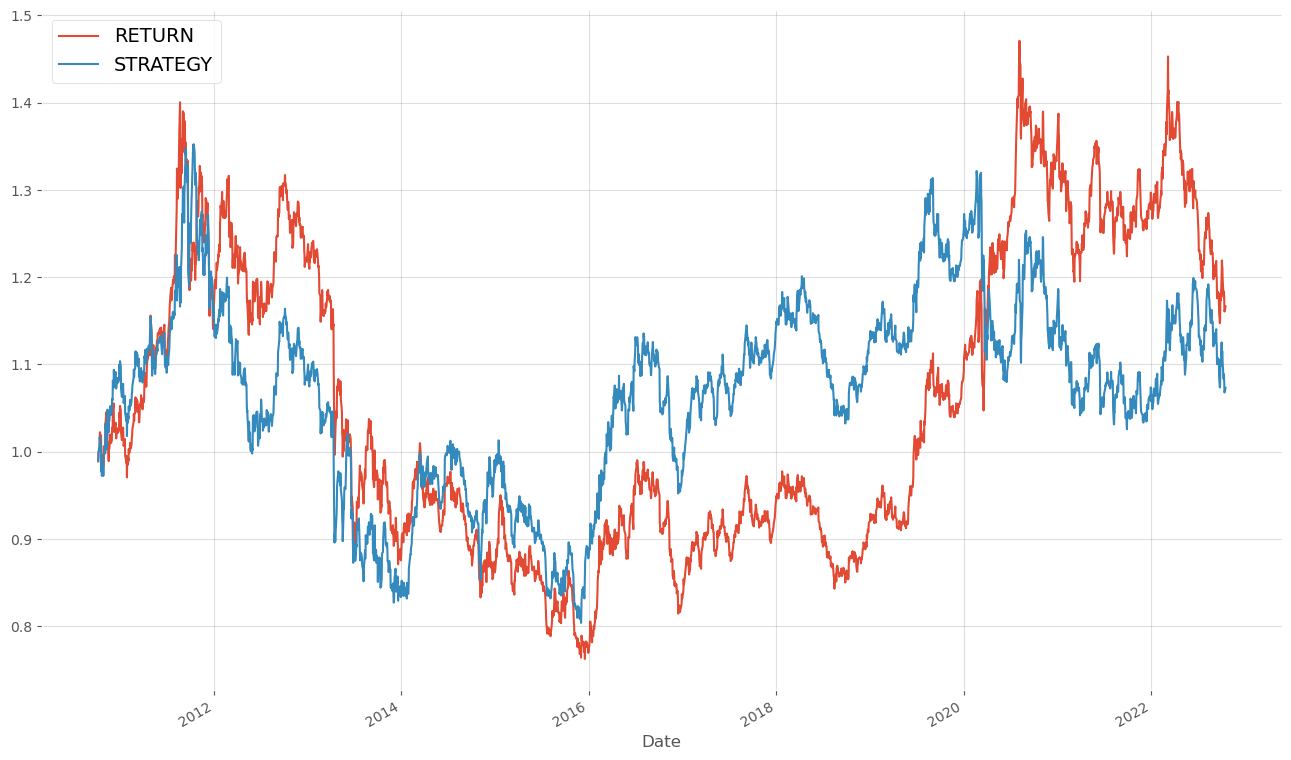

In [138]:
GOLD[["RETURN", "STRATEGY"]
    ].cumsum().apply(np.exp).plot(figsize = (16, 10)
                                 )

> Let's increase the number of lags used from three to five.

> Will it increase or decrease the hit ratio?

> What about the gross performance of the strategy (in-sample, before transaction costs)?

In [139]:
GOLD["RETURN"] = np.log(GOLD["Close"] / GOLD["Close"].shift(1)
                        )

In [141]:
lags = 5

cols = []

for lag in range(1, lags +1):
    col = "lag_{}".format(lag)
    GOLD[col] = GOLD["RETURN"].shift(lag)
    cols.append(col)
    
GOLD.dropna(inplace = True)

In [142]:
GOLD

,Open,High,Low,Close,Adj Close,Volume,RETURN,lag_1,lag_2,lag_3,PREDICTION,STRATEGY,lag_4,lag_5
Date,,,,,,,,,,,,,,
2010-10-15,134.240005,134.460007,133.070007,133.679993,133.679993,26168600,-0.007972,0.005059,0.015863,-0.002498,1.0,-0.007972,0.004774,0.009846
2010-10-18,133.460007,134.339996,133.160004,134.279999,134.279999,12289500,0.004478,-0.007972,0.005059,0.015863,1.0,0.004478,-0.002498,0.004774
2010-10-19,130.460007,131.589996,129.750000,130.110001,130.110001,25327200,-0.031547,0.004478,-0.007972,0.005059,1.0,-0.031547,0.015863,-0.002498
2010-10-20,130.360001,131.649994,130.320007,131.320007,131.320007,12556600,0.009257,-0.031547,0.004478,-0.007972,1.0,0.009257,0.005059,0.015863
2010-10-21,131.080002,131.589996,128.720001,129.470001,129.470001,21804200,-0.014188,0.009257,-0.031547,0.004478,1.0,-0.014188,-0.007972,0.005059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-12,155.509995,156.289993,155.259995,155.990005,155.990005,3998500,0.005335,-0.002060,-0.015318,-0.011023,1.0,0.005335,-0.001127,-0.005554
2022-10-13,153.479996,155.729996,152.919998,154.910004,154.910004,7083800,-0.006948,0.005335,-0.002060,-0.015318,1.0,-0.006948,-0.011023,-0.001127
2022-10-14,154.020004,154.199997,152.720001,152.979996,152.979996,5471900,-0.012537,-0.006948,0.005335,-0.002060,1.0,-0.012537,-0.015318,-0.011023


In [105]:
M.fit(GOLD[cols], np.sign(GOLD["RETURN"]
                         )
     )

LogisticRegression(C=10000000.0, max_iter=1000)

In [106]:
GOLD["PREDICTION"] = M.predict(GOLD[cols]
                              )

In [107]:
GOLD["PREDICTION"].value_counts()

PREDICTION
 1.0    2714
-1.0     309
Name: count, dtype: int64

In [108]:
accuracy =\
    np \
    .sign(GOLD["RETURN"].iloc[lags:] * GOLD["PREDICTION"].iloc[lags:]
         ).value_counts()

accuracy

 1.0    1573
-1.0    1434
 0.0      11
Name: count, dtype: int64

In [109]:
accuracy_score(GOLD["PREDICTION"],
               np.sign(GOLD["RETURN"]
                     )
              )

0.5210056235527621

<Axes: xlabel='Date'>

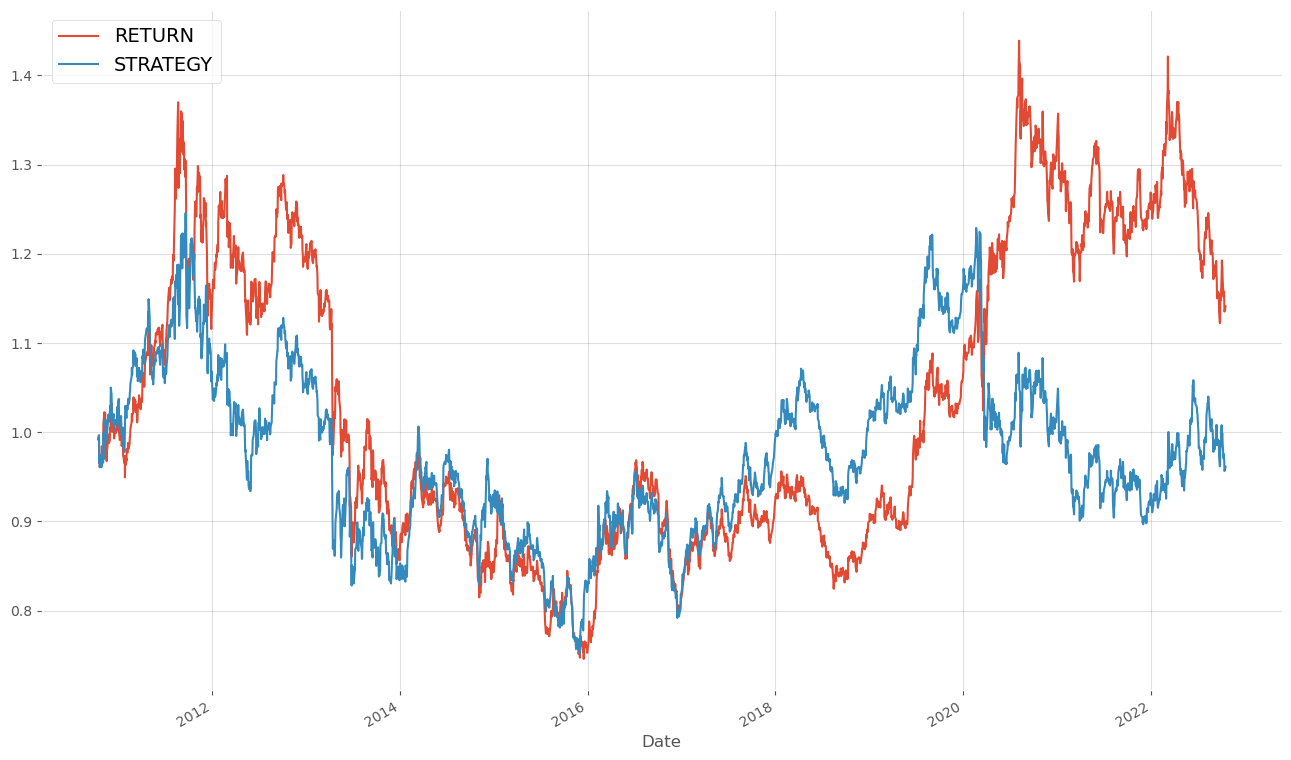

In [110]:
GOLD["STRATEGY"] = GOLD["PREDICTION"] * GOLD["RETURN"]

GOLD \
    [["RETURN", "STRATEGY"]] \
    .sum() \
    .apply(np.exp)

GOLD \
    [["RETURN", "STRATEGY"]] \
    .cumsum() \
    .apply(np.exp) \
    .plot(figsize = (16,10)
         )

### What's Next 🌟

> We just learned the holy grail in quantitative finance: predicting future market movements. As a starting point, we were introduced to statistics and machine learning to predict the future market direction based on past returns or similar financial quantities. Some first in-sample results appear to be promising, both for estimation and classification problems. Yet, a more reliable impression is attained when evaluating such strategies as factoring in transaction costs as well as out-of-sample.

> In our next lesson, we will expand our learning to using deep learning to  predict market movements. Specifically, we will use deep neural networks to predict market direction. You will also learn how to add features to your models to develop a better predictive model.

## <a id = "p6">6.</a>  <font color = "green"> What We Learned... (For Your Revision) </font>  [back to table of contents](#top)

> `Thank you for working with the script, Team 👍`